## **Evaluating Regression Models for Accurate Diamond Valuation**

<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8" />
  <meta name="viewport" content="width=device-width, initial-scale=1.0"/>
  <title></title>
  <style>
    body {
      font-family: 'Segoe UI', sans-serif;
      background-color:rgb(167, 233, 213);
      color: #222;
      margin: 0;
      padding: 0;
      text-align: left;
    }

    h1 {
      font-size: 2.5em;
      margin-top: 80px;
      padding: 20px;
      background-color:rgb(229, 212, 212);
      border: 1px solid #ddd;
      border-radius: 8px;
      display: inline-block;
      color:rgb(49, 108, 167);
    }

    h1 span {
      display: block;
      font-size: 1em;
      color: #555;
      margin-top: 8px;
    }

    .author-container {
      display: flex;
      justify-content: center;
      align-items: center;
      flex-wrap: wrap;
      gap: 20px;
      margin: 30px auto;
      padding: 20px;
      max-width: 700px;
      background-color: #fff;
      border: 1px solid #ddd;
      border-radius: 8px;
    }

    .author-container a {
      text-decoration: none;
    }

    .author-container img {
      border-radius: 6px;
      padding: 6px;
      background-color:rgb(234, 234, 234);
    }

    .author-container a span {
      display: block;
      margin-top: 6px;
      font-size: 0.95em;
      color: #333;
    }
  </style>
</head>
<body>

<h1 style="
  font-family: 'Segoe UI', sans-serif;
  font-weight: bold;
  font-style: italic;
  color:rgb(49, 108, 167);
  -webkit-font-smoothing: antialiased;
  text-shadow: 0 1px 1px rgba(218, 55, 55, 0.94);
">
  👨‍🏫 Author: Muhammad Mohsin Farooq
</h1>


  <div class="author-container">
    <a href="https://github.com/MOHSIN184" target="_blank">
      <img src="https://img.shields.io/badge/GitHub-Profile-181717?style=for-the-badge&logo=github" alt="GitHub">
    </a>
    <a href="https://www.kaggle.com/mmohsinfarooqhussain" target="_blank">
      <img src="https://img.shields.io/badge/Kaggle-Profile-20BEFF?style=for-the-badge&logo=kaggle" alt="Kaggle">
    </a>
    <a href="http://www.linkedin.com/in/m-mohsin-farooq-hussain-962a9a323" target="_blank">
      <img src="https://img.shields.io/badge/LinkedIn-Profile-0077B5?style=for-the-badge&logo=linkedin" alt="LinkedIn">
    </a>
  </div>

</body>
</html>



### Introduction

The primary objective of this notebook is to conduct a thorough evaluation of various machine learning models,for regression task, to identify the most accurate algorithm for predicting the target variable. The evaluation will culminate with the application of the best-performing model only the test dataset, ensuring that the model's performance is assessed on unseen data.

#### Goals

- To compare a range of machine learning algorithms for regression task.
- To select the top-performing model based on key performance metrics.

#### Algorithms Evaluated

In my exploration, I will evaluate the following machine learning algorithms:

- **Regression Algorithms:**
  - Random Forest Regression
  - XGBoost Regression
  - Support Vector Regressor

#### Dataset Overview

The dataset under scrutiny is the Diamond Dataset. It provides detailed attributes for each diamond, which are critical in determining its quality and value. The key features included in the dataset are as follows:

- **Carat**: Weight of the diamond measured in carats.
- **Cut**: Quality of the diamond's cut, categorized into grades such as Fair, Good, Very Good, Premium, and Ideal.
- **Color**: Diamond color grade, ranging from D (colorless) to J (slightly tinted).
- **Clarity**: Measure of the diamond's clarity, with categories like IF (Internally Flawless), VVS1/VVS2 (Very Very Slightly Included), VS1/VS2 (Very Slightly Included), SI1/SI2 (Slightly Included), and I1 (Included).
- **Depth**: Total depth percentage calculated as z / mean(x, y) = 2 * z / (x + y).
- **Table**: Width of the diamond's table expressed as a percentage of its average diameter.
- **Price**: Price of the diamond in US dollars.
- **X (Length)**: Length of the diamond in millimeters (mm).
- **Y (Width)**: Width of the diamond in millimeters (mm).
- **Z (Depth)**: Depth of the diamond in millimeters (mm).

These features collectively contribute to a diamond's appearance, quality, and overall market value.

#### Data Preprocessing

Prior to model evaluation, the following preprocessing steps were implemented to ensure data quality and readiness for analysis:

- **Missing Values**: Conducted a comprehensive check for missing values within the dataset.
- **Data Distribution**: Examined the distribution and skewness of the dataset to understand the underlying data structure.
- **Feature Engineering**: Applied appropriate transformations to enhance model performance where necessary.

#### Acknowledgements

This dataset is taken from seaborn library.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder


import warnings 
warnings.filterwarnings("ignore")

#### Load Diamond Dataset

In [2]:
df = sns.load_dataset('diamonds')
df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Data Processing

  ##### Diamond Dataset Shape Inspection

In [3]:
# Get the shape of the DataFrame, containing the number of rows and columns
df.shape
print(f"• Total entries: {df.shape[0]}") 
print(f"• Total columns: {df.shape[1]}")

• Total entries: 53940
• Total columns: 10


##### Dataset Structure

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


##### Covert price columns int to float

In [5]:
df['price'] = df['price'].astype(float)

##### Summary Statistics with `skimpy`

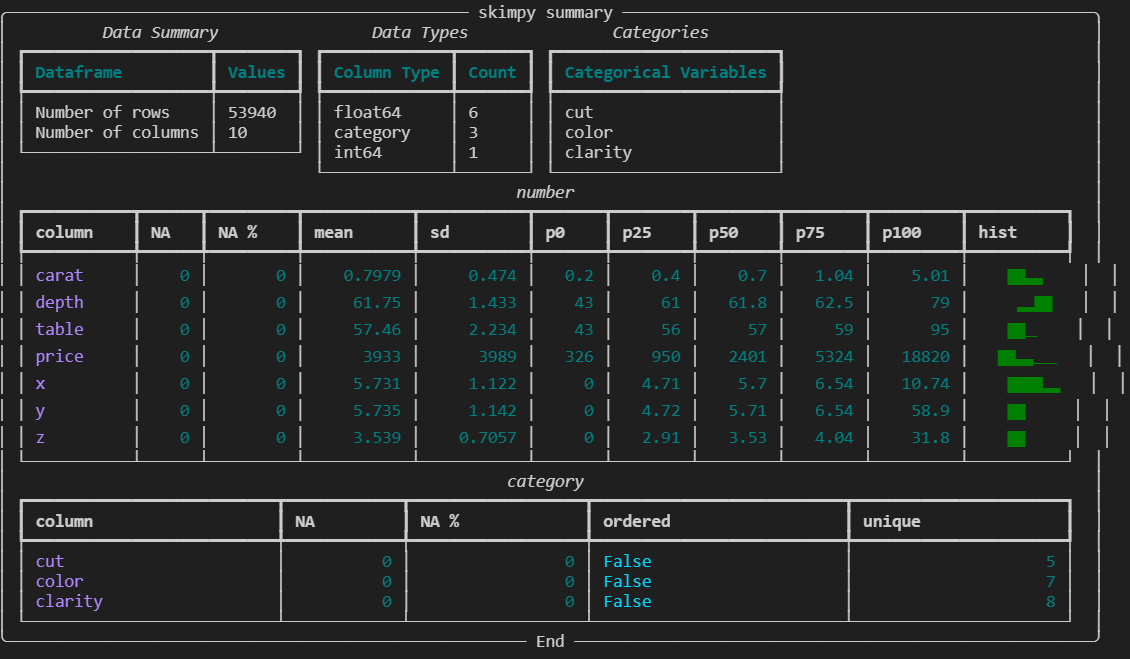

##### Summary of the DataFrame's column types

In [6]:
def print_data_summary(df):
    # Count the number of categorical columns
    categorical_count = df.select_dtypes(include=['category']).shape[1]
    # Count the number of float columns
    float_count = df.select_dtypes(include=['float64']).shape[1]
    # Count the number of integer columns
    int_count = df.select_dtypes(include=['int64']).shape[1]
    
    # Print the counts in a bullet-point format
    print(f"• Categorical columns: {categorical_count}")
    print(f"• Float columns: {float_count}")
    print(f"• Integer columns: {int_count}")

# Print a heading for the data summary section (assuming 'heading' is a defined function)
print_data_summary(df)

• Categorical columns: 3
• Float columns: 7
• Integer columns: 0


### Correlation Matrix

#### Ordinal Categorical Variables and Encoding Methods

Given that all the categorical variables in the diamond dataset are ordinal, it would be more appropriate to use Label Encoding rather than One-Hot Encoding. This is because Label Encoding tends to perform better with ordinal data types.

In [7]:
cat_cols=['cut','color','clarity']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
for col in cat_cols:
	df[col] = le.fit_transform(df[col])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 4.1 MB


##### Encoding Ordinal Categorical Variables

In [10]:
from sklearn.preprocessing import LabelEncoder

for col in cat_cols:
    le_col = LabelEncoder()
    le_col.fit(sns.load_dataset('diamonds')[col])
    print(f"'{col}' encoding:")
    for i, cat in enumerate(le_col.classes_):
        print(f"  {i} → '{cat}'")
    print()

'cut' encoding:
  0 → 'Fair'
  1 → 'Good'
  2 → 'Ideal'
  3 → 'Premium'
  4 → 'Very Good'

'color' encoding:
  0 → 'D'
  1 → 'E'
  2 → 'F'
  3 → 'G'
  4 → 'H'
  5 → 'I'
  6 → 'J'

'clarity' encoding:
  0 → 'I1'
  1 → 'IF'
  2 → 'SI1'
  3 → 'SI2'
  4 → 'VS1'
  5 → 'VS2'
  6 → 'VVS1'
  7 → 'VVS2'



#### Plotting Correlation Matrix

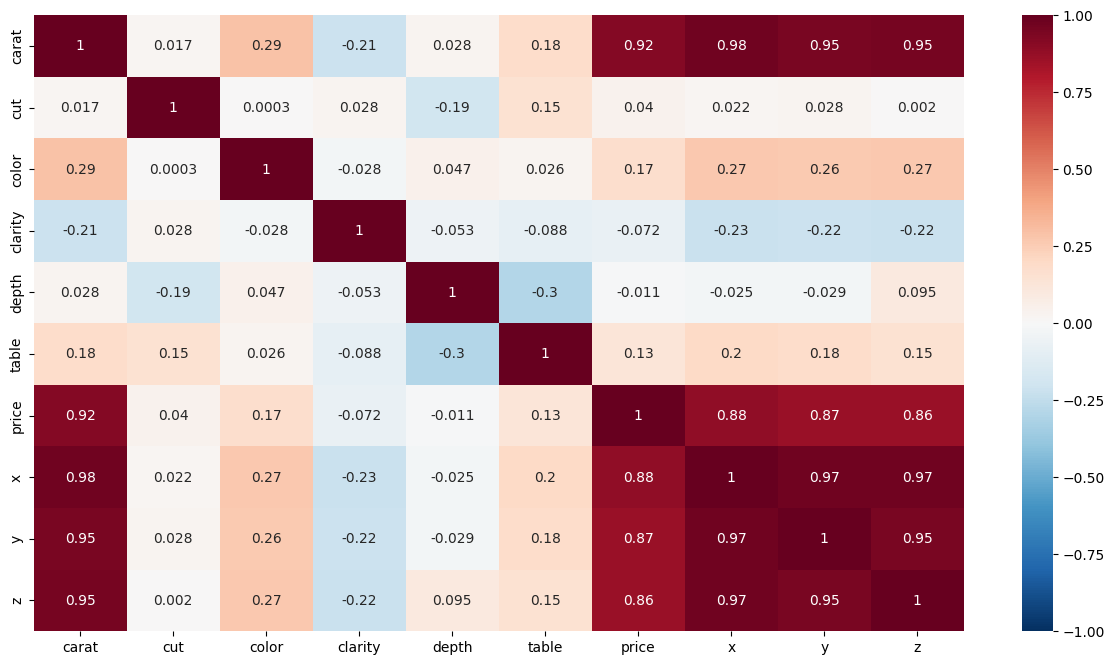

In [11]:
# copy the dataset to a new dataframe for plotting correlation matrix
df_corr = df.copy()
# create a list of categorical features by checking the data type
cat_cols = df_corr.select_dtypes(include=['object', 'category']).columns.tolist()
# plot crr matrix to see the correlation between the variables
corr = df_corr.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap='RdBu_r', vmin=-1, vmax=1)
plt.show()

##### Correlation Observations in the Diamond Dataset

Upon examination of the correlation matrix for the diamond dataset, there is a notably strong correlation between the price of the diamonds and their carat weight. This strong positive correlation suggests that as the carat weight of a diamond increases, the price typically rises in tandem, indicating that carat weight is a significant predictor of diamond price.

Additionally, the dimensions of the diamond, specifically the length, width, and depth (referred to as 'x', 'y', and 'z' in the dataset), also show substantial positive correlations with the price. This implies that larger diamonds, as characterized by their measurements, tend to be more expensive.

## Missing Values Inspection - Plotting Heatmap

#### Plotting Heatmap

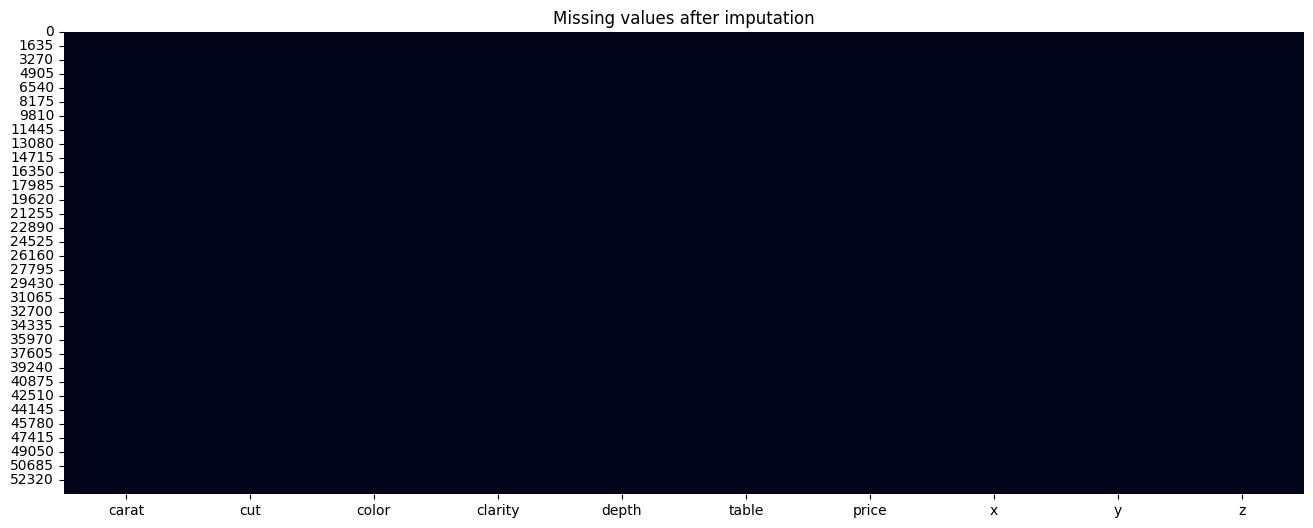

In [12]:
# Plotting heatmap to check missing values after imputation
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing values after imputation')
plt.show()

#### Observation - Completeness of the Diamond Dataset

The diamond dataset is fully populated, with no missing values present across all features, ensuring robustness for statistical analysis and machine learning modeling.

## Data Distribution Analysis

#### Plotting Distribution


The following function generates histograms and boxplots for each numerical column in the dataset to assess the distribution and identify outliers.

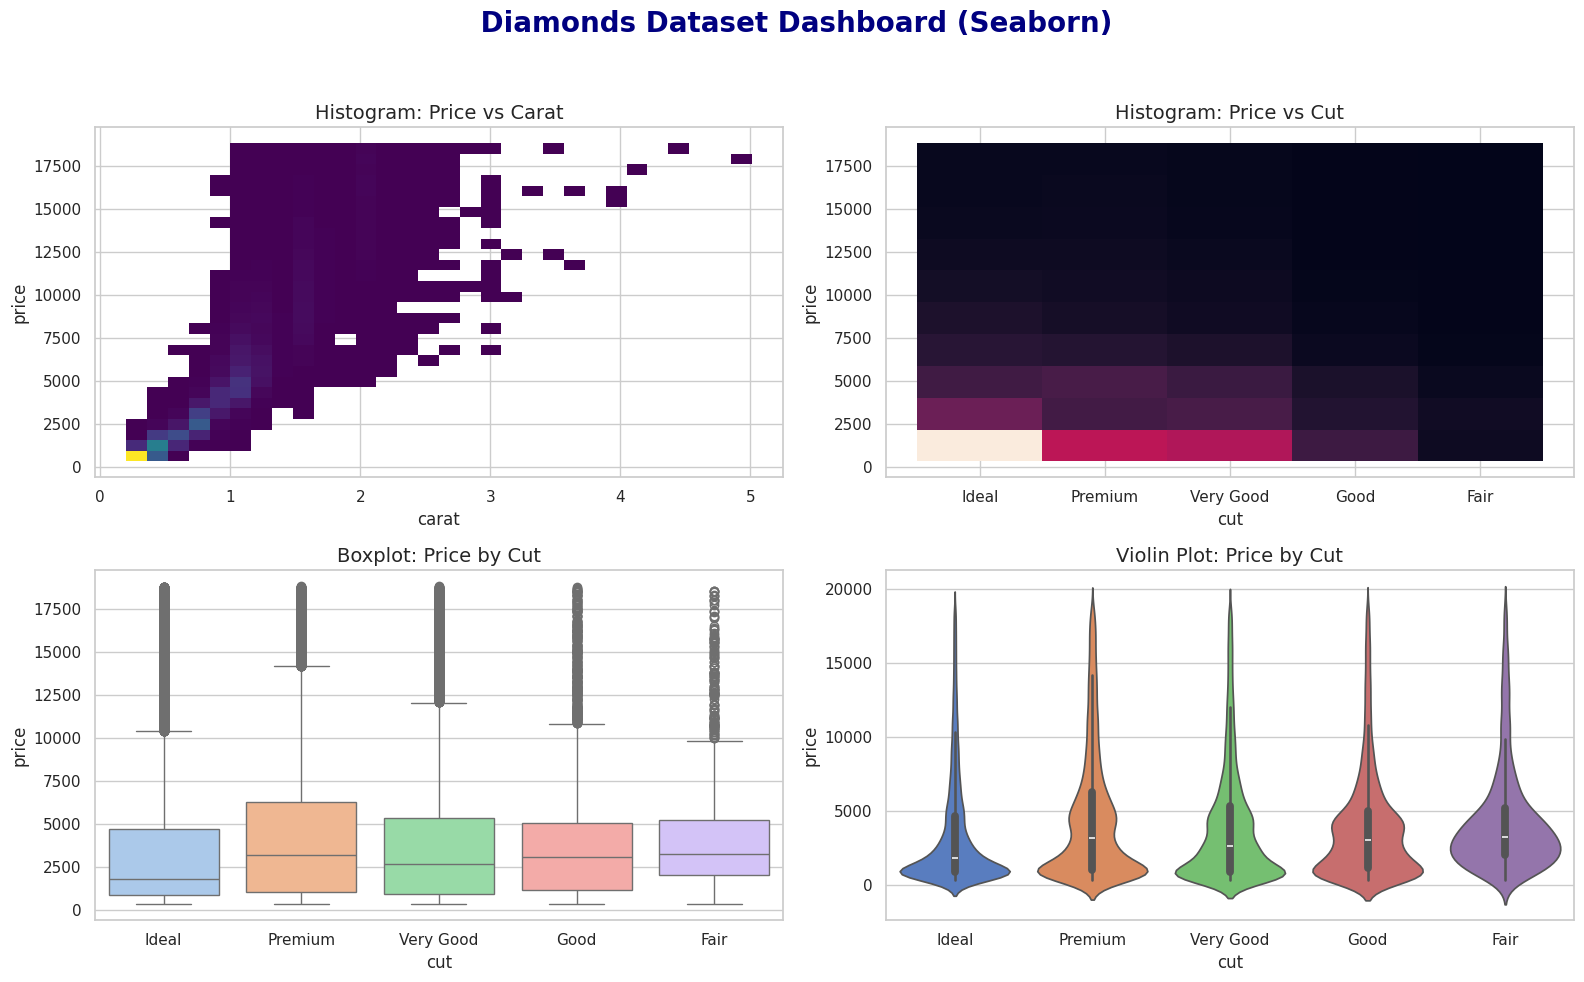

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
df = sns.load_dataset('diamonds')
sns.set(style="whitegrid")

# Set up the dashboard layout: 2 rows x 2 columns
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle(" Diamonds Dataset Dashboard (Seaborn)", fontsize=20, fontweight='bold', color='navy')

# 1. Histogram: Price vs Carat
sns.histplot(data=df, x='carat', y='price', bins=30, cmap='viridis', ax=axes[0, 0])
axes[0, 0].set_title("Histogram: Price vs Carat", fontsize=14)

# 2. Histogram: Price by Cut
sns.histplot(data=df, x='cut', y='price', bins=10, cmap='rocket', ax=axes[0, 1])
axes[0, 1].set_title("Histogram: Price vs Cut", fontsize=14)

# 3. Boxplot: Price by Cut
sns.boxplot(data=df, x='cut', y='price', palette='pastel', ax=axes[1, 0])
axes[1, 0].set_title("Boxplot: Price by Cut", fontsize=14)

# 4. Violin Plot: Price by Cut
sns.violinplot(data=df, x='cut', y='price', inner='box', palette='muted', ax=axes[1, 1])
axes[1, 1].set_title("Violin Plot: Price by Cut", fontsize=14)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle
plt.show()


### 🔍 Key Insights from Diamonds Dataset Dashboard

- 💎 **Carat vs Price**: There's a clear positive correlation — diamonds with higher carat values generally have higher prices.
- 📊 **Cut Distribution**: Most diamonds fall into the *Ideal* and *Premium* categories, but higher cut quality does not always mean a higher price.
- 📦 **Boxplot Analysis**: All cut types exhibit significant outliers, with wide price variability—especially in the *Ideal* and *Very Good* cuts.
- 🎻 **Violin Plot**: Price distributions are right-skewed across all cut types, with *Fair* and *Premium* cuts showing the broadest spread.


## Comprehensive Model Evaluation Framework

##### Data Preparation for Regression Analysis

In [14]:
X=df.drop('price',axis=1)
y=df['price']

In [15]:
numeric_cols=X.select_dtypes(include=['int64','float64']).columns.tolist()
cats_cols=X.select_dtypes(include=['object','category']).columns.tolist()

#### Create a numerical pipeline and a categorical pipeline for regression and classification tasks.

In [16]:
numeric_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('sacler',StandardScaler())
])

In [17]:
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', OneHotEncoder(handle_unknown='ignore'))
])


#### Using the `ColumnTransformer` to apply the pipelines to the respective columns in the dataset.

In [18]:
preprocessor=ColumnTransformer([
    ('num',numeric_pipeline,numeric_cols),
    ('cats',cat_pipeline,cats_cols)
])

#### Create pipeline for Random Forest Regressor

In [19]:
model_pipeline=Pipeline([
    ('preprocessor',preprocessor),
    ('regressor',RandomForestRegressor(n_estimators=100,random_state=42)),
])

#### Train-Test Split (80-20)

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

#### Fit the model to the training data in the pipeline

In [21]:
model_pipeline.fit(X_train, y_train) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('sacler',
                                                                   StandardScaler())]),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z']),
                                                 ('cats',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

#### Now we can use the trained pipeline to make predictions on the test data.


In [22]:
y_pred=model_pipeline.predict(X_test)

#### Evaluate the model's performance using various regression metrics

In [23]:
print("MAE on Random Forest",mean_absolute_error(y_test,y_pred))
print("MSE on Random Forest",mean_squared_error(y_test,y_pred))
print("R2 on Random Forest",r2_score(y_test,y_pred))

MAE on Random Forest 270.1552311283554
MSE on Random Forest 303125.65491227584
R2 on Random Forest 0.9809316814784846


## For Support Vector Regressor
#### Create pipeline for Support Vector Regressor

In [24]:
model_pipeline1=Pipeline([
    ('preprocessor',preprocessor),
    ('regressor1',SVR()),
])
model_pipeline1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('sacler',
                                                                   StandardScaler())]),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z']),
                                                 ('cats',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('regressor1', SVR())])

In [25]:
y_pred1=model_pipeline1.predict(X_test)
print("MAE on SVR",mean_absolute_error(y_test,y_pred1))
print("MSE on SVR",mean_squared_error(y_test,y_pred1))
print("R2 on SVR",r2_score(y_test,y_pred1))

MAE on SVR 1300.7923455583734
MSE on SVR 7645304.866470231
R2 on SVR 0.5190670732566831


## XGBoost Regressor
#### Create pipeline for XGBoost Regressor

In [26]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

model_pipeline2 = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor2', XGBRegressor())
])

model_pipeline2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('sacler',
                                                                   StandardScaler())]),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z']),
                                                 ('cats',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('regres...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [27]:
y_pred2 = model_pipeline2.predict(X_test)
print("MAE on xgboost", mean_absolute_error(y_test, y_pred2))
print("MSE on xgboost", mean_squared_error(y_test, y_pred2))
print("R2 on xgboost", r2_score(y_test, y_pred2))

MAE on xgboost 285.61346435546875
MSE on xgboost 318286.3125
R2 on xgboost 0.9799779653549194


##### Display the best performer 

In [28]:
# Display the best performer
best_reg_model = {
    'MAE': mean_absolute_error(y_test, y_pred2),
    'MSE': mean_squared_error(y_test, y_pred2),
    'R2': r2_score(y_test, y_pred2)    
}
# Print the best model's performance metrics
print("BEST REGRESSION MODEL PERFORMANCE")
print(f"MAE: {best_reg_model['MAE']:.2f}")
print(f"MSE: {best_reg_model['MSE']:.2f}")
print(f"R2: {best_reg_model['R2']:.2f}")
# Display the best performer
best_model = model_pipeline2 if best_reg_model['R2'] > r2_score(y_test, y_pred1) else model_pipeline1
print("Best Model: XGBoost Regressor" if best_model == model_pipeline2 else "Best Model: SVR")

BEST REGRESSION MODEL PERFORMANCE
MAE: 285.61
MSE: 318286.31
R2: 0.98
Best Model: XGBoost Regressor


##### Save The Best Performing Model

In [29]:

import joblib
best_model_filename = 'best_model.joblib'
joblib.dump(best_model, best_model_filename)
print(f"Best model saved as {best_model_filename}")


Best model saved as best_model.joblib


##### Load The Best Performer Model

In [30]:
best_model_filename = 'best_model.joblib'
loaded_model = joblib.load(best_model_filename)
print(f"Best model loaded from {best_model_filename}")

Best model loaded from best_model.joblib


##### Diamond Regression Prediction from Dummy Data

In [32]:
# Initialize a dictionary with dummy data for a single diamond
dummy_diamond_data = {
    'carat': [0.23],
    'cut': ['Ideal'],
    'color': ['E'],
    'clarity': ['SI2'],
    'depth': [69.5],
    'table': [59],
    'x': [3.25],
    'y': [3.30],
    'z': [2.9]
}
# Convert the dictionary to a DataFrame
dummy_diamond_df = pd.DataFrame(dummy_diamond_data)

# Make a prediction using the loaded model
prediction = loaded_model.predict(dummy_diamond_df)
print(f"Predicted diamond price: {prediction[0]}")


Predicted diamond price: 569.1475219726562


### 🎉 Conclusion

+ The primary objective of this analysis was to compare different machine learning algorithms for the regression task of predicting diamond prices. Among the models tested—Random Forest, Support Vector Regression (SVR), and XGBoost—the **Random Forest Regressor** delivered the best performance, achieving the lowest **MAE (270.15)**, **MSE (303,125.65)**, and the highest **R² score (0.9809)**.

+ XGBoost followed closely with competitive results, while SVR significantly underperformed, showing a much higher error and lower R² score (0.5190). This suggests that **tree-based ensemble models are more effective** in capturing the complex relationships in the diamond dataset compared to SVR. Therefore, Random Forest stands out as the most reliable and accurate model for this regression task.

